In [1]:
import pandas as pd

import requests
key_Ic = "14d147c6c7ce0c4e470c10292deb7e10"

### 地理/逆地理编码
#### 思考：提供了坐标定位，帮助用户通过某个坐标值来反向查询得到该地物所在的行政区域等最匹配的标准地址信息。

In [2]:
# 地理编码
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_Ic,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
中大南方 = geocode(address='广东省广州市从化区中山大学南方学院')
print(中大南方)
df_中大南方地理编码 = pd.json_normalize(中大南方['geocodes'])
display(df_中大南方地理编码)
中大南方地理编码 = 中大南方['geocodes'][0]['location']
print("中大南方地理编码:",中大南方地理编码)

# base逆地理编码
def regeocode(location,poitype=None,radius=None,extensions="base",batch=True,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_Ic,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

中大南方逆地理编码_base = regeocode(中大南方地理编码)
print(中大南方逆地理编码_base)
df_中大南方逆地理编码_base = pd.json_normalize(中大南方逆地理编码_base)
display(df_中大南方逆地理编码_base)

# all逆地理编码
中大南方逆地理编码_all = regeocode(中大南方地理编码,extensions="all")
print(中大南方逆地理编码_all)
df_中大南方逆地理编码_all = pd.json_normalize(中大南方逆地理编码_all)
display(df_中大南方逆地理编码_all)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省广州市从化区中山大学南方学院', 'country': '中国', 'province': '广东省', 'citycode': '020', 'city': '广州市', 'district': '从化区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440117', 'street': [], 'number': [], 'location': '113.679287,23.632575', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省广州市从化区中山大学南方学院,中国,广东省,020,广州市,从化区,[],440117,[],[],"113.679287,23.632575",兴趣点,[],[],[],[]


中大南方地理编码: 113.679287,23.632575
{'status': '1', 'regeocode': {'addressComponent': {'city': '广州市', 'province': '广东省', 'adcode': '440117', 'district': '从化区', 'towncode': '440117103000', 'streetNumber': {'number': '7号', 'location': '113.6786,23.6333289', 'direction': '西北', 'distance': '109.203', 'street': '博学路'}, 'country': '中国', 'township': '温泉镇', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '020'}, 'formatted_address': '广东省广州市从化区温泉镇中山大学南方学院'}, 'info': 'OK', 'infocode': '10000'}


,status,info,infocode,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,regeocode.addressComponent.towncode,regeocode.addressComponent.streetNumber.number,regeocode.addressComponent.streetNumber.location,...,regeocode.addressComponent.streetNumber.street,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.formatted_address
0,1,OK,10000,广州市,广东省,440117,从化区,440117103000,7号,"113.6786,23.6333289",...,博学路,中国,温泉镇,[[]],[],[],[],[],020,广东省广州市从化区温泉镇中山大学南方学院


{'status': '1', 'regeocode': {'roads': [{'id': '020F49F0050461203', 'location': '113.68,23.634', 'direction': '南', 'name': '博学路', 'distance': '156.951'}, {'id': '020F49F0050462451', 'location': '113.677,23.6347', 'direction': '东南', 'name': '中山路', 'distance': '343.951'}, {'id': '020F49F006047765', 'location': '113.682,23.6394', 'direction': '南', 'name': 'S29从莞深高速', 'distance': '807.947'}], 'roadinters': [{'second_name': '中山路', 'first_id': '020F49F0050461203', 'second_id': '020F49F0050462451', 'location': '113.6767944,23.63466139', 'distance': '343.951', 'first_name': '博学路', 'direction': '东南'}], 'formatted_address': '广东省广州市从化区温泉镇中山大学南方学院', 'addressComponent': {'city': '广州市', 'province': '广东省', 'adcode': '440117', 'district': '从化区', 'towncode': '440117103000', 'streetNumber': {'number': '7号', 'location': '113.6786,23.6333289', 'direction': '西北', 'distance': '109.203', 'street': '博学路'}, 'country': '中国', 'township': '温泉镇', 'businessAreas': [[]], 'building': {'name': [], 'type': []}, 'neighb

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '020F49F0050461203', 'location': '113....","[{'second_name': '中山路', 'first_id': '020F49F00...",广东省广州市从化区温泉镇中山大学南方学院,广州市,广东省,440117,从化区,...,中国,温泉镇,[[]],[],[],[],[],020,"[{'area': '536585.849985', 'type': '141201', '...","[{'id': 'B00140MR9A', 'direction': '西', 'busin..."


### 公交路径规划
#### 思考：可将智能规划好的路径可视化，地图可显示的实物包括路况、街道店铺等真实信息，优化导航效果。

In [3]:
# 准备base url、params、response.json（） 
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key_Ic,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# 准备walking 参数
广东金融学院 = geocode('广东省广州市广东金融学院')
广东金融学院_location = 广东金融学院['geocodes'][0]['location']
中山大学南方学院 = geocode('广东省广州市中山大学南方学院')
中山大学南方学院_location = 中山大学南方学院['geocodes'][0]['location']
print("(起点)广东金融学院_location:",广东金融学院_location,"(终点)中山大学南方学院_location:",中山大学南方学院_location)

# C-3 公交路径规划
广金_南方学院 = integrated(广东金融学院_location,中山大学南方学院_location,city='广州',extensions='all')
df_bus = pd.json_normalize(广金_南方学院)
df_bus

pd.json_normalize(广金_南方学院["route"]['transits'])
pd.json_normalize(广金_南方学院["route"]['transits'][0]['segments'])
df_bus_基本信息 = pd.json_normalize(广金_南方学院["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_基本信息

(起点)广东金融学院_location: 113.380731,23.202540 (终点)中山大学南方学院_location: 113.679287,23.632575


,name,id,type,distance,duration,polyline,bustimetag,start_time,end_time,via_num,via_stops,departure_stop.name,departure_stop.id,departure_stop.location,arrival_stop.name,arrival_stop.id,arrival_stop.location
0,39路(龙洞总站--天河公交场总站),440100016613,普通公交线路,8557,2543,"113.377283,23.199655;113.377287,23.199797;113....",0,0610,2200,18,"[{'name': '迎福路', 'id': '440100016613027', 'loc...",龙洞总站,440100016613026,"113.377283,23.199655",燕塘企业,440100016613019,"113.327866,23.160259"
1,30路(龙洞总站--广州火车站总站),440100016527,普通公交线路,8706,2520,"113.377381,23.199656;113.377331,23.199789;113....",0,[],[],18,"[{'name': '迎福路', 'id': '440100016527035', 'loc...",龙洞总站,440100016527034,"113.377381,23.199656",燕塘企业,440100016527019,"113.327904,23.160299"


In [4]:
# 公交车信息处理结果
_39路公交车 = pd.json_normalize(广金_南方学院["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"_39路公交车"})
_30路公交车 = pd.json_normalize(广金_南方学院["route"]['transits'][0]['segments'][0]['bus']["buslines"][1]["via_stops"]).rename(columns={"name":"_30路公交车"})
display(_39路公交车,_30路公交车)

,_39路公交车,id,location
0,迎福路,440100016613027,"113.373810,23.200573"
1,广东外贸学校,440100016613004,"113.370560,23.200512"
2,龙洞北,440100016613005,"113.367981,23.202808"
3,龙眼洞森林公园,440100016613006,"113.365723,23.201799"
4,迎龙路(迎新路口),440100016613007,"113.364700,23.199158"
5,迎龙路,440100016613029,"113.365303,23.194405"
6,龙洞路口,440100016613008,"113.366142,23.192551"
7,地铁植物园站,440100016613009,"113.365280,23.189671"
8,植物园正门,440100016613010,"113.363609,23.187431"
9,三宝墟,440100016613011,"113.359627,23.183903"


,_30路公交车,id,location
0,迎福路,440100016527035,"113.373909,23.200583"
1,广东外贸学校,440100016527004,"113.370544,23.200506"
2,龙洞北,440100016527005,"113.368027,23.202795"
3,龙眼洞森林公园,440100016527006,"113.365730,23.201799"
4,迎龙路(迎新路口),440100016527037,"113.364700,23.199158"
5,迎龙路,440100016527007,"113.365273,23.194485"
6,龙洞路口,440100016527008,"113.366096,23.192669"
7,地铁植物园站,440100016527009,"113.365295,23.189682"
8,植物园正门,440100016527010,"113.363625,23.187464"
9,三宝墟,440100016527011,"113.359627,23.183903"


### 行政区域查询
#### 思考：明确规划地域图谱并调取

In [5]:
def district(keywords,subdistrict=3,page=None,offset=None,extensions='all',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_Ic,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='广东',extensions='all',subdistrict=3)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_广州市 = pd.json_normalize(行政区域["districts"][0]['districts'][20]['districts'])
display(df_行政区域_1级,df_行政区域_2级_广州市)


,citycode,adcode,name,center,level,districts
0,0758,441200,肇庆市,"112.472529,23.051546",city,"[{'citycode': '0758', 'adcode': '441224', 'nam..."
1,0757,440600,佛山市,"113.122717,23.028762",city,"[{'citycode': '0757', 'adcode': '440607', 'nam..."
2,0754,440500,汕头市,"116.708463,23.37102",city,"[{'citycode': '0754', 'adcode': '440513', 'nam..."
3,0752,441300,惠州市,"114.412599,23.079404",city,"[{'citycode': '0752', 'adcode': '441324', 'nam..."
4,0755,440300,深圳市,"114.085947,22.547",city,"[{'citycode': '0755', 'adcode': '440306', 'nam..."
5,0756,440400,珠海市,"113.553986,22.224979",city,"[{'citycode': '0756', 'adcode': '440402', 'nam..."
6,0759,440800,湛江市,"110.364977,21.274898",city,"[{'citycode': '0759', 'adcode': '440883', 'nam..."
7,0662,441700,阳江市,"111.975107,21.859222",city,"[{'citycode': '0662', 'adcode': '441781', 'nam..."
8,0660,441500,汕尾市,"115.364238,22.774485",city,"[{'citycode': '0660', 'adcode': '441523', 'nam..."
9,0768,445100,潮州市,"116.632301,23.661701",city,"[{'citycode': '0768', 'adcode': '445122', 'nam..."


,citycode,adcode,name,center,level,districts
0,020,440117,从化区,"113.587386,23.545283",district,"[{'citycode': '020', 'adcode': '440117', 'name..."
1,020,440115,南沙区,"113.53738,22.794531",district,"[{'citycode': '020', 'adcode': '440115', 'name..."
2,020,440114,花都区,"113.211184,23.39205",district,"[{'citycode': '020', 'adcode': '440114', 'name..."
3,020,440113,番禺区,"113.364619,22.938582",district,"[{'citycode': '020', 'adcode': '440113', 'name..."
4,020,440103,荔湾区,"113.243038,23.124943",district,"[{'citycode': '020', 'adcode': '440103', 'name..."
5,020,440105,海珠区,"113.262008,23.103131",district,"[{'citycode': '020', 'adcode': '440105', 'name..."
6,020,440111,白云区,"113.262831,23.162281",district,"[{'citycode': '020', 'adcode': '440111', 'name..."
7,020,440118,增城区,"113.829579,23.290497",district,"[{'citycode': '020', 'adcode': '440118', 'name..."
8,020,440112,黄埔区,"113.450761,23.103239",district,"[{'citycode': '020', 'adcode': '440112', 'name..."
9,020,440106,天河区,"113.335367,23.13559",district,"[{'citycode': '020', 'adcode': '440106', 'name..."


### 搜索POI

In [6]:
# 关键字搜索
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_Ic,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

广州_美食 = place_text('美食','餐饮服务',city="广州市",children=1,extensions='all')
广州_美食

{'status': '1',
 'count': '898',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFG2O2GR',
   'parent': 'B00140BOXP',
   'childtype': '202',
   'name': '自助回转火锅百汇(地王广场店)',
   'tag': '肥牛,麻辣锅底,麻辣汤底,海带,牛筋丸,芋头,番茄汤底,猪红,花甲,鹅肠,豆腐,火锅,西兰花,芒果,腐皮,濑尿虾,金针菇,蟹柳,牛百叶,火龙果,白贝,圣女果,排骨汤底,鸭胸肉,番薯叶',
   'type': '餐饮服务;中餐厅;火锅店',
   'typecode': '050117',
   'biz_type': 'diner',
   'address': '较场西路26号地王广场B1层(东门,寿司皇大旁)',
   'location': '113.283835,23.125681',
   'tel': '020-83733051;020-83701797',
   'postcode': [],
   'website': [],
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '020',
   'cityname': '广州市',
   'adcode': '440104',
   'adname': '越秀区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3413525202',
   'distance': [],
   'navi_poiid': [],
   'entr_location': '113.283337,23.12567',
   'business_area': '大东',
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestam

In [7]:
df_广州_美食 = pd.json_normalize(广州_美食["pois"])
display(df_广州_美食)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFG2O2GR,B00140BOXP,202,自助回转火锅百汇(地王广场店),"肥牛,麻辣锅底,麻辣汤底,海带,牛筋丸,芋头,番茄汤底,猪红,花甲,鹅肠,豆腐,火锅,西兰花...",餐饮服务;中餐厅;火锅店,050117,diner,"较场西路26号地王广场B1层(东门,寿司皇大旁)","113.283835,23.125681",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,47.00,0
1,B00141K2HX,[],[],卡朋西餐馆,"卡朋皇牌杂扒,香煎黑椒牛排,蘑菇忌廉汤,铁板猪颈扒,牛油果系列,渔夫沙律,奥尔良鸡翅,粟米忌...",餐饮服务;外国餐厅;西餐厅(综合风味),050201,diner,"较场西路16号之二原综合楼西南角2层,3层(麦当劳南侧)","113.283377,23.123732",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.0,60.00,0
2,B0FFH89QY2,[],[],澳门街(地王广场店),"葡烧猪颈肉,咖喱大海虾,葡挞,咖喱鸡,咖喱牛筋腩,奶酪烤羊排,马介休炒蛋饭,桂花蜜香骨,红烧...",餐饮服务;中餐厅;中餐厅,050100,diner,较场西路26号地王广场负一层1001铺,"113.283385,23.125811",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,66.00,0
3,B00140B248,B00140U0SG,201,笑味轩(中华广场),"南瓜粥,牛肉石锅拌饭,芝士炸鸡年糕,鲜五花肉,光阳烤肉,小菜,笑味轩冷面,泡菜炒饭,人参鸡汤...",餐饮服务;外国餐厅;韩国料理,050203,diner,中山三路33号中华广场7F层748,"113.282144,23.125857",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",B00140U0SG,7,7F,119020210700091,4.0,70.00,0
4,B00140T61P,[],[],稻香海鲜点心酒家(万斯店),"稻香招牌烧鹅,脆皮烧鸡,虾饺,酱汁蒸凤爪,开胃山楂糕,红米肠粉,明虾烧卖皇,淮山豉汁蒸排骨,...",餐饮服务;中餐厅;火锅店,050117,diner,白云路22号8号公馆2层(近嘉星广场),"113.282542,23.117798",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],4.0,62.00,0
5,B0FFG84O3U,B00140ACA3,202,点都德(中山四路),"金沙红米肠,金牌虾饺皇,豉汁蒸凤爪,荔湾艇仔粥,芒果椰子糕,沙爹金钱肚,金牌靓油条,特色蒸排...",餐饮服务;快餐厅;茶餐厅,050305,diner,中山四路246号信德大厦5层全层,"113.271567,23.126007",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],5.0,77.00,0
6,B00140SQ68,[],[],银记肠粉店(中三分店),"牛肉肠,艇仔粥,一颗柠檬茶,咸煎饼,鸳鸯肠,猪肉拉肠,招牌三宝肠粉,豉油皇牛肉肠,及第粥,白...",餐饮服务;中餐厅;中餐厅,050100,diner,东昌大街3号,"113.281206,23.126878",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,20.00,0
7,B00140CK77,B00140U0SG,201,华融宫(中华广场),"红烧乳鸽,华融虾饺皇,点心,芝士焗番薯,华融第一包,金枕榴莲酥,乳香藕条炒猪颈肉,松化鸡蛋挞...",餐饮服务;中餐厅;海鲜酒楼|餐饮服务;中餐厅;综合酒楼,050119|050101,diner,中山三路33号中华广场7F层747-746,"113.281983,23.125563",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",B00140U0SG,7,7F,119020210700090,3.5,79.00,0
8,B00140NOXA,[],[],表哥茶餐厅(中三店),"热奶茶,表哥招牌混酱厚多士,柱候牛筋腩捞面,菠萝油,招牌云吞面,招牌白粥,叉烧拼烧鹅饭,干炒...",餐饮服务;快餐厅;茶餐厅,050305,diner,大东街,"113.280929,23.126913",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,49.00,0
9,B00140U1MV,[],[],风味馆(越秀南路店),"大牛三星汤,牛腩陈村粉,小碗牛三星,双弦柏叶汤,牛杂,细三星汤,酸甜萝卜,牛腩汤粉,牛肚薏米...",餐饮服务;中餐厅;中餐厅,050100,diner,越秀南路161号(嘉年华芬兰浴馆对面),"113.277423,23.121133",...,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.5,14.00,0


In [11]:
# 周边搜索
def place_around(location,keywords=None,types=None,city=None,redius=None,sortrule=None,offset=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/around?parameters'
    params={
        'key':key_Ic,
        'keywords':keywords,
        'location':location,
        'types':types,
        'city':city,
        'redius':redius,
        'sortrule':sortrule,
        'offset':offset,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

广州商学院_周边POI = place_around('113.56882,23.303876') # 查询中心点的经纬度
广州商学院_周边POI

{'status': '1',
 'count': '260',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFJIVTID',
   'parent': 'B0FFFAIKXG',
   'childtype': '309',
   'name': '广州商学院同德大饭店',
   'type': '餐饮服务;中餐厅;中餐厅',
   'typecode': '050100',
   'biz_type': 'diner',
   'address': [],
   'location': '113.568297,23.303376',
   'tel': [],
   'distance': '77',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFK9DPT9',
   'parent': [],
   'childtype': [],
   'name': '柒茶',
   'type': '餐饮服务;餐饮相关场所;餐饮相关',
   'typecode': '050000',
   'biz_type': 'diner',
   'address': '广州康大职业技术学院金贝子餐厅2楼',
   'location': '113.568132,23.303125',
   'tel': [],
   'distance': '109',
   'biz_ext': [],
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFGO9KNX',
   'parent': [],
   'childtype': [],
   'name': '菜鸟驿站(广州商学院店)',
   'type': '生活服务;物流速递;物流速递'

### 静态地图
#### 思考：智能截取图片更加精准

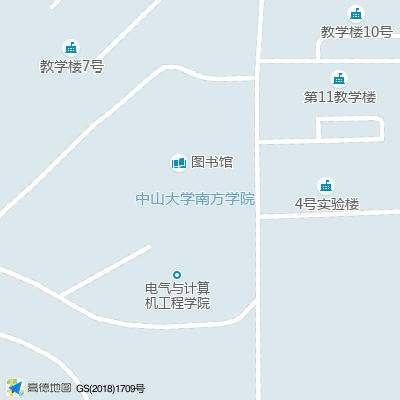

In [27]:
from PIL import Image # 生成图片
from io import BytesIO # 
def map(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_Ic,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
map(location='113.679287,23.632575',zoom=18)

### IP定位
#### 思考：追踪黑客地址，高效破案

In [35]:
def ip(ip=None,sig=None)->dict:
    url='https://restapi.amap.com/v3/ip?parameters'
    parameters = {
        'key':key_Ic,
        'ip':ip,
        'sig':sig,
        'output':'json'
    }
    r = requests.get (url,parameters)
    data = r.json()
    del data['status']
    del data['info']
    df = ["省份:%s"%(data['province']),"地区:%s"%(data['city']),"地理编码:%s"%(data['adcode']),"经纬度:%s"%(data['rectangle'])]
    print("ip:"+ip)
    for i in df:
        print(i)
    return

ip('182.254.192.28')

ip:182.254.192.28
省份:广东省
地区:广州市
地理编码:440100
经纬度:113.1017375,22.93212254;113.6770499,23.3809537


### 坐标转换

In [59]:
def assistant(location=None,coordays=None)->dict:
    url='https://restapi.amap.com/v3/assistant/coordinate/convert?parameters'
    parameters = {
        'key':key_Ic,
        'coordays':coordays,
        'locations':location,
        'output':'json'
    }
    r = requests.get(url,params=parameters)
    data = r.json()
    del data['status']
    del data['info']
    return data

assistant("116.487585177952,39.991754014757|116.487585177952,39.991653917101","baidu")

{'infocode': '10000',
 'locations': '116.487585177952,39.991754014757|116.487585177952,39.991653917101'}

### 天气查询
#### 思考：可以监测到一个地方的实时天气情况，可与旅游应用合作，实现智能推荐服务，例如在XX天气之下去XX游玩更加合适

In [55]:
def weather(city=None)->dict:
    url='https://restapi.amap.com/v3/weather/weatherInfo?parameters'
    parameters = {
        'key':key_Ic,
        'city':city,
        'output':'json'
    }
    r = requests.get(url,params=parameters)
    data = r.json()
    return data

weather('汕尾')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '汕尾市',
   'adcode': '441500',
   'weather': '阴',
   'temperature': '18',
   'winddirection': '东北',
   'windpower': '≤3',
   'humidity': '100',
   'reporttime': '2020-04-22 17:22:40'}]}

### 输入提示
#### 思考：有助于了解一个坐标周边的概括，可开发一个找房子的应用，主要用户为在其他地方只能通过线上找房的的房客，通过可视化形式呈现给用户房子周边的建筑等等

In [73]:
def inputtips(keywords=None):
    url='https://restapi.amap.com/v3/assistant/inputtips?parameters'
    
    parameters ={
        'key':key_Ic,
        'keywords':keywords,
        'output':'json',
    }
    r = requests.get(url,params=parameters)
    data = r.json()
    del data['status']
    del data['info']
    return data

inputtips("中山大学")

{'count': '10',
 'infocode': '10000',
 'tips': [{'id': 'B00141IHRZ',
   'name': '中山大学广州校区南校园',
   'district': '广东省广州市海珠区',
   'adcode': '440105',
   'location': '113.298415,23.096714',
   'address': '新港西路135号',
   'typecode': '141201',
   'city': []},
  {'id': 'B02F402P24',
   'name': '中山大学珠海校区',
   'district': '广东省珠海市香洲区',
   'adcode': '440402',
   'location': '113.586266,22.349455',
   'address': '大学路',
   'typecode': '141201',
   'city': []},
  {'id': 'B0FFK8L6A0',
   'name': '中山大学北校区',
   'district': '广东省广州市越秀区',
   'adcode': '440104',
   'location': '113.289856,23.128307',
   'address': '东风东路658号',
   'typecode': '141201',
   'city': []},
  {'id': 'B00140NUN1',
   'name': '中山大学附属第六医院',
   'district': '广东省广州市天河区',
   'adcode': '440106',
   'location': '113.364133,23.118252',
   'address': '员村二横路26号(本部区)',
   'typecode': '090101',
   'city': []},
  {'id': 'B03017WMXK',
   'name': '中山大学附属东华医院',
   'district': '广东省东莞市',
   'adcode': '441900',
   'location': '113.786305,23.030219',
   

### 交通态势
#### 通过车辆密度进行智能决策判断路况，为司机定制一个时间与经济成本最优化的道路选择

In [74]:
def rectangle(rectangle=None)->dict:
    url='https://restapi.amap.com/v3/traffic/status/rectangle?parameters'
    parameters = {
        'key':key_Ic,
        'rectangle':rectangle,
        'output':'json'
    }
    r = requests.get(url,params=parameters)
    data = r.json()
    return data

rectangle('116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：从太阳宫桥到苏州桥畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

### 批量请求接口
#### 思考：在某一个特定区域可以了解到某一个服务类型之下有什么具体的选择，具有分地区分类功能，可以再添加一些标签（美食/商场/电影院等等）的情况下为用户提供智能推荐服务。

In [83]:
def batch() ->dict:
    url='https://restapi.amap.com/v3/batch?'
    parameters = {
        'key':key_Ic,
    }
    body={
            "ops": [
                {
                    "url": "/v3/place/around?offset=10&page=1&key=14d147c6c7ce0c4e470c10292deb7e10&location=113.300039,23.102687&output=json&radius=100000&types=080000"
                },
                {
                    "url": "/v3/place/around?offset=10&page=1&key=14d147c6c7ce0c4e470c10292deb7e10&location=118.50394379585519,39.278209477408794&output=json&radius=100000&types=080000"
                }
                    ]
            }
    r = requests.get(url,params=parameters,json=body)
    data = r.json()
    return data
batch()

[{'status': 200,
  'body': {'suggestion': {'keywords': {}, 'cities': {}},
   'info': 'OK',
   'status': '1',
   'count': '890',
   'pois': [{'typecode': '080111',
     'adname': '海珠区',
     'biz_type': {},
     'id': 'B0FFIZ2OH2',
     'pname': '广东省',
     'importance': {},
     'parent': {},
     'location': '113.302026,23.103119',
     'distance': '209',
     'tel': '020-89235107;15920304911',
     'biz_ext': {'rating': '5.0', 'cost': {}},
     'shopid': {},
     'address': '滨江东路555号金海湾小区商业C座2楼',
     'poiweight': {},
     'cityname': '广州市',
     'photos': [{'url': 'http://store.is.autonavi.com/showpic/84d8002e00c401d95278a153e41d7db1',
       'title': {},
       'provider': {}},
      {'url': 'http://store.is.autonavi.com/showpic/303af78c88d9c2d2c9fc16d4edaaa44f',
       'title': {},
       'provider': {}},
      {'url': 'http://store.is.autonavi.com/showpic/2e98b05813289ab4125b6c9328081a22',
       'title': {},
       'provider': {}}],
     'type': '体育休闲服务;运动场馆;健身中心',
     'shopinf

### 地理围栏

In [87]:
# 创建地理围栏
def create(name="围栏A",center="113.289856,23.128307",radius="2000",valid_time="2020-06-20",desc="测试围栏A"):
    url ='https://restapi.amap.com/v4/geofence/meta?'
    parameters = {
        "key":key_Ic,
    }
    body = {
        "name": "围栏A",
        "center": "113.289856,23.128307",
        "radius": "2000",
        "enable": "true",
        "valid_time": "2020-06-20",
        "repeat": "Mon,Tues,Wed,Thur,Fri,Sat,Sun",
        "time": "00:00,11:59;13:00,20:59",
        "desc": "测试围栏A",
        "alert_condition": "enter;leave"
    }
    r = requests.get(url,params=parameters,json=body)
    data = r.json()
    return data
create('113.289856,23.128307')

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

In [90]:
# 查询围栏
def geofence():
    url = 'https://restapi.amap.com/v4/geofence/meta?'
    parameters = {
        "key":key_Ic,
    }
    body = {
        "name":"围栏A"
    }
    r = requests.get(url,params=parameters,json=body)
    data = r.json()
    return data
geofence()

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 轨迹纠偏

In [100]:
def correct_error()->dict:
    url = 'https://restapi.amap.com/v4/grasproad/driving?key=14d147c6c7ce0c4e470c10292deb7e10'
    params=[{
"x": 116.449429,
"y": 40.014844,
"sp": 4,
"ag": 110,
"tm": 1478831753
}, {
"x": 116.449639,
"y": 40.014776,
"sp": 3,
"ag": 110,
"tm": 23
}, {
"x": 116.449859,
"y": 40.014716,
"sp": 3,
"ag": 111,
"tm": 33
}, {
"x": 116.450074,
"y": 40.014658,
"sp": 3,
"ag": 110,
"tm": 31
}, {
"x": 116.450273,
"y": 40.014598,
"sp": 3,
"ag": 111,
"tm": 20
}]
    response = requests.post(url,json=params)
    data = response.json()
    return data
correct_error()

{'data': {'distance': 33.0,
  'points': [{'x': 116.44942000249563, 'y': 40.014843356125866},
   {'x': 116.44945705955585, 'y': 40.01453960973057}]},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 设计一款涉及三个API功能的简单应用
#### 应用功能：一款专门为有车一族设计的app
#### API功能：POI搜索关键词，路径规划，交通态势
#### 功能简介：有车一族的司机在该应用上搜索目的地关键词，人工智能根据路径的距离与交通路况的态势为司机规划出一个距离与时间最优的路径，为司机大大节省时间成本和减少耗油。